# Shark!!!!!
## Data driven conclusions on shark attacks worldwide.


As a first step we import all the packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

The first step is to import the csv file into a Pandas data frame.  We show the head of the data frame in order to make a visual analysys of the provided data.

In [2]:
rawData = pd.read_csv('GSAF5.csv', encoding = 'ISO-8859-1') # reading de csv file using pandas required using special encoding
rawData.head() #shows firs 5 rows of data so we can determine disposable data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


### Droping columns
Several columns can be droped from the data since they don't provide usefull information to reach any conclusions.

In [3]:
data = rawData.drop(['Case Number', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis = 1)
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


With the new "data" data frame it's easier to analize the usable information and decide an objective that can be tested with the available data.

## Objective:

Given the available data, it is interesting to see if there is a relation between tha fatlity of the attacks and the activity that the victim was doing.  A conclusion could be reached identifying the higher risk activities related to shark attacks.

### Data Cleaning

Now that we have a clear objective to reach we can start by droping data that isn't relevant to our objective.

In an initial visual inspection of the head of the data frame it is evident that "Age" & "Species" columns are missing data.  Further analisis searching for missing values is in order.

In [4]:
null_cols = data.isnull().sum()
print(null_cols[null_cols > 0])
print('Data entrys: {}'.format(len(data.index)-1))

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64
Data entrys: 5991


"Age", "Time" and "Species" have a significant ammount of null data.  These columns can be deleted since over half the entrys are empty.

A limit of 1000 empty cells is selected.  If the data  column has more than 1000 empty cells (17%) it is deleted.

From observing the first rows of the remaining data, we can see that the "Name" column has currupt data (male as name), and since the individual name of the victim is of no interest to us, we can delete the column.

The column "Injury" has a very specific discription of the victim's injury.  This type of data is hard to cuantify and the result of the injury can be found on the "Fatal" column, so we can delete this column too since it has little relevante informatin towards our objective.

The "Investigator or Source" column can be deleted since we have decided to trust all the data from the data set ignoring its origin.

In [5]:
drop_cols = list(null_cols[null_cols > 1000].index)
data = data.drop(drop_cols, axis=1)
data = data.drop(['Name' ,'Injury', 'Investigator or Source'], axis = 1)

data.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Fatal (Y/N)
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N


All the empty cells are going to be relaced with the text "Unknown"

In [6]:
data.fillna('Unknown', inplace = True) #replace all NaN values to "Unknown"
null_cols = data.isnull().sum()
print(null_cols[null_cols > 0]) #check if all NaN values have been replaced with "Unknown"


Series([], dtype: int64)


The core focus of the investigation is ACTIVITY, so a deeper analysis is in order.  Counting all the different inputs of the Activity column can give insight on the next step.

In [7]:
data.Activity.value_counts() #Display Activity entrys for visual analisis

Surfing                                                                               904
Swimming                                                                              819
Unknown                                                                               530
Fishing                                                                               414
Spearfishing                                                                          321
Bathing                                                                               153
Wading                                                                                144
Diving                                                                                123
Standing                                                                               97
Snorkeling                                                                             77
Scuba diving                                                                           74
Body board

By inspecting all the entrys in activity, it is evident that some activities can be grouped in larger activity types such as Surfing, Swiming, Diving, etc.  

In [8]:

data['Activity'].loc[data['Activity'].str.contains('Surf') ] = 'Surfing' # Change all activities that contain 'surf' into 'Surfing
data['Activity'].loc[data['Activity'].str.contains('surf') ] = 'Surfing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Swim') ] = 'Swimming' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('swim') ] = 'Swimming' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('fishing') ] = 'Fishing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Fishing') ] = 'Fishing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Dive') ] = 'Diving' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Diving') ] = 'Diving' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('diving') ] = 'Diving' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('board') ] = 'Boarding' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Board') ] = 'Boarding' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Wading') ] = 'Bathing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Standing') ] = 'Bathing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Walking') ] = 'Bathing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Treading') ] = 'Bathing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Kayak') ] = 'Canoeing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Float') ] = 'Swimming' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Row') ] = 'Canoeing' # Change all activities that contain 'surf' into 'Surfing'
data['Activity'].loc[data['Activity'].str.contains('Boat') ] = 'Sailing' # Change all activities that contain 'surf' into 'Surfing'

data.Activity.value_counts()


C:\Users\Martin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Surfing                                                                                                                                                      1185
Swimming                                                                                                                                                     1095
Fishing                                                                                                                                                      1094
Unknown                                                                                                                                                       530
Diving                                                                                                                                                        502
Bathing                                                                                                                                                       483
Boarding                    

We can also see that many of the Activity entrys are unique, so we can group all those instances in a category called "Other"

Every entry that is repeated less than 10 times (0.17 %) is dumped in the "Other" category.

In [9]:
data['Activity'] = data['Activity'].where((data['Activity'] == 'Surfing') | 
                                          (data['Activity'] == 'Swimming') | 
                                          (data['Activity'] == 'Fishing') |
                                          (data['Activity'] == 'Diving') |
                                          (data['Activity'] == 'Unknown') |
                                          (data['Activity'] == 'Bathing') |
                                          (data['Activity'] == 'Boarding') |
                                          (data['Activity'] == 'Snorkeling') |
                                          (data['Activity'] == 'Canoeing') |
                                          (data['Activity'] == 'Sailing'), 'Other' )
data.Activity.value_counts()


Surfing       1185
Swimming      1095
Fishing       1094
Other          690
Unknown        530
Diving         502
Bathing        483
Boarding       235
Snorkeling      77
Canoeing        66
Sailing         35
Name: Activity, dtype: int64

After grouping the Activities, we can move into other columns to correct.

In [10]:
data.rename(columns={'Sex ':'Sex'}, inplace=True)
data.Sex.value_counts()

M          4835
F           585
Unknown     567
M             2
.             1
N             1
lli           1
Name: Sex, dtype: int64

In [11]:
data['Sex'] = data['Sex'].str.replace('M ', 'M')
data['Sex'] = data['Sex'].str.replace('N', 'M')
data['Sex'] = data['Sex'].str.replace('lli', 'Unknown')
data['Sex'] = data['Sex'].str.replace('.', 'Unknown')
data.Sex.value_counts()

M          4838
F           585
Unknown     569
Name: Sex, dtype: int64

In [12]:
data.rename(columns={'Fatal (Y/N)':'Fatal'}, inplace=True)
data.Fatal.value_counts()

N          4315
Y          1552
UNKNOWN      94
Unknown      19
 N            8
F             1
N             1
n             1
#VALUE!       1
Name: Fatal, dtype: int64

In [13]:
data['Fatal'] = data['Fatal'].str.replace(' N', 'N')
data['Fatal'] = data['Fatal'].str.replace('n', 'N')
data['Fatal'] = data['Fatal'].str.replace('N ', 'N')
data.Fatal.value_counts()

N          4325
Y          1552
UNKNOWN      94
UNkNowN      19
F             1
#VALUE!       1
Name: Fatal, dtype: int64

In [14]:
data['Fatal'] = data['Fatal'].str.replace('UNKNOWN', 'Unknown')
data['Fatal'] = data['Fatal'].str.replace('#VALUE!', 'Unknown')
data['Fatal'] = data['Fatal'].str.replace('F', 'Y')
data['Fatal'] = data['Fatal'].str.replace('UNkNowN', 'Unknown')
data.Fatal.value_counts()

N          4325
Y          1553
Unknown     114
Name: Fatal, dtype: int64

In [15]:

data.Type.value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [16]:
data['Type'] = data['Type'].str.replace('Boating', 'Boat')
data.Type.value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Boat             310
Sea Disaster     220
Name: Type, dtype: int64

In [17]:
data.Year.value_counts()

2015    139
2011    128
2014    125
0       124
2013    122
2008    121
2009    120
2012    117
2007    112
2006    103
2016    103
2005    103
2010    101
2000     97
1959     93
1960     93
2001     92
2004     92
2003     92
2002     88
1962     86
1961     78
1995     76
1964     66
1998     65
1999     65
1996     61
1963     61
1966     58
1997     57
       ... 
1785      1
1834      1
1791      1
1733      1
1721      1
1637      1
1617      1
77        1
5         1
1703      1
1755      1
1767      1
1771      1
1779      1
1787      1
1803      1
1749      1
1807      1
1811      1
1819      1
1805      1
1831      1
1555      1
1738      1
1859      1
1742      1
1758      1
1818      1
1822      1
1595      1
Name: Year, Length: 232, dtype: int64

In [18]:
data['Year'] = data['Year'].where(data['Year'] > 999, 0)  # unknown = 0 to keep type = int
data.Year.value_counts()

2015    139
2011    128
0       127
2014    125
2013    122
2008    121
2009    120
2012    117
2007    112
2016    103
2005    103
2006    103
2010    101
2000     97
1960     93
1959     93
2004     92
2001     92
2003     92
2002     88
1962     86
1961     78
1995     76
1964     66
1999     65
1998     65
1963     61
1996     61
1966     58
1997     57
       ... 
1554      1
1738      1
1742      1
1818      1
1755      1
1822      1
1834      1
1846      1
1850      1
1854      1
1866      1
1703      1
1767      1
1831      1
1805      1
1617      1
1637      1
1721      1
1733      1
1749      1
1785      1
1819      1
1771      1
1811      1
1807      1
1803      1
1791      1
1787      1
1779      1
1638      1
Name: Year, Length: 229, dtype: int64

Since the specific date of the incident doesn't provide much insight to our objective, we have decided to dop the column.


In [19]:
data = data.drop('Date', axis = 1)

After cleaning the relevant Columns we show the head of the data frame to see the results

In [20]:
data.head()

,Year,Type,Country,Area,Location,Activity,Sex,Fatal
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N


The first three values are duplicates after the data cleaning.  So droping duplicates is a good idea at this point.

In [21]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  205


In [22]:
data.head()

,Year,Type,Country,Area,Location,Activity,Sex,Fatal
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N
5,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Unknown,N
6,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Bathing,M,N


After the data is clean, graphing the relevant variables of the data is an easy way to reach conclusions.

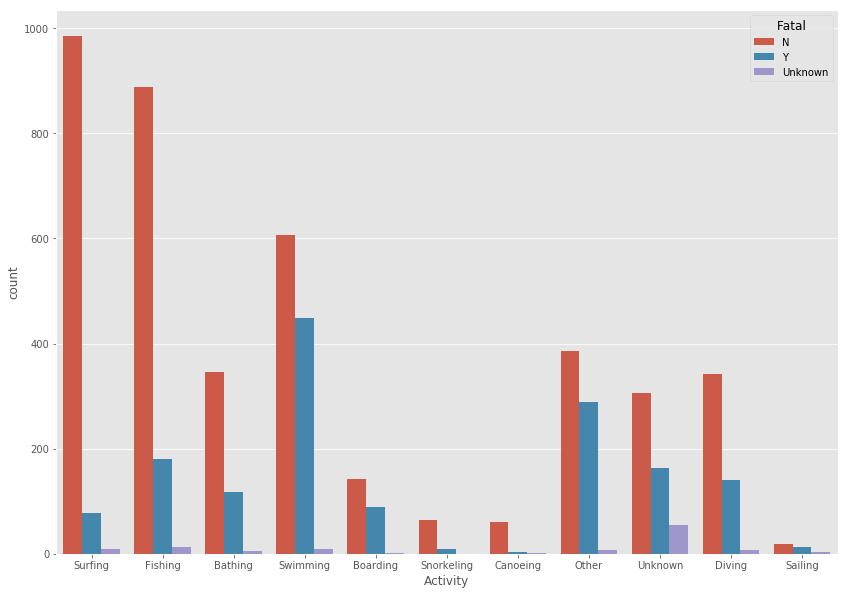

In [23]:
plt.figure(figsize=(14, 10))
style.use('ggplot')
sns.countplot(x='Activity', hue = 'Fatal', data = data)

## Conclusions:
Surfing has the highest rate of attacks over any other activity, yet the fatality rate of the attacks is very low.  On the other hand Swimming is the third larges group of victims, and has the largest fatality rate of all activities.  It is evident that the highest risk activity is Swimming.

In [24]:
data.to_csv('clean_data.csv', index=False)